# Jupiter's Notebook for Scenario 05
Requieres: [CategoryEncoders](http://contrib.scikit-learn.org/category_encoders/), [imbalanced-learn](https://imbalanced-learn.org/stable/), [XGBoost](https://pypi.org/project/xgboost/), and [dill](https://pypi.org/project/dill/)<br>
`pip install category_encoders`<br>
`pip install imbalanced-learn`<br>
`pip install xgboost`<br>
`pip install dill`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To identify class 0 and 1, respectively
target_names = ['class 0', 'class 1']

In [3]:
#load dataset
df=pd.read_csv('esc-05-Mixed-traffic.csv')

In [4]:
#No trunkated 
pd.set_option('display.max_columns', None)

In [5]:
#Dataset dimensions, number of sessions and features
df.shape

(235047, 52)

In [6]:
#counting classes
collections.Counter(df.label.values)

Counter({0: 234175, 1: 872})

In [7]:
#check the number of null values
print(df.isnull().sum())
print(df.isnull().values.sum())

proto                 0
ts                    0
srcIP                 0
srcPrt                0
dstIP                 0
dstPrt                0
flowduration          0
total_fpackets        0
total_bpackets        0
total_fpktl           0
total_bpktl           0
min_fpktl             0
min_bpktl             0
max_fpktl             0
max_bpktl             0
mean_fpktl            0
mean_bpktl            0
std_fpktl             0
std_bpktl             0
total_fipt            0
total_bipt            0
min_fipt              0
min_bipt              0
max_fipt              0
max_bipt              0
mean_fipt             0
mean_bipt             0
std_fipt              0
std_bipt              0
fpsh_cnt              0
bpsh_cnt              0
furg_cnt              0
burg_cnt              0
total_fhlen           0
total_bhlen           0
fPktsPerSecond        0
bPktsPerSecond        0
flowPktsPerSecond     0
flowBytesPerSecond    0
mean_flowpktl         0
std_flowpktl          0
mean_flowipt    

In [8]:
#Dropping Rows with NA inplace
df.dropna(inplace=True)

In [9]:
#sumarize the number of unique values for each column 
print(df.nunique())

proto                      2
ts                    235047
srcIP                  10896
srcPrt                 52820
dstIP                   9121
dstPrt                   159
flowduration          146619
total_fpackets           646
total_bpackets           837
total_fpktl             9020
total_bpktl            19539
min_fpktl                128
min_bpktl                495
max_fpktl               1292
max_bpktl               1002
mean_fpktl             18650
mean_bpktl             22812
std_fpktl              31894
std_bpktl              28039
total_fipt             79401
total_bipt             68439
min_fipt               39584
min_bipt               21411
max_fipt               77114
max_bipt               60980
mean_fipt              76692
mean_bipt              66633
std_fipt               65172
std_bipt               59806
fpsh_cnt                 142
bpsh_cnt                 383
furg_cnt                   1
burg_cnt                   1
total_fhlen             3078
total_bhlen   

In [10]:
# Delete time stamp (ts), srcIP and dstIP features
# Models do not learn with IP addresses
df.drop(['ts','srcIP','dstIP'],axis=1,inplace=True)

In [11]:
#Dataset dimensions, number of sessions and features
print(df.shape)

(235047, 49)


In [12]:
#Delete Rows That Contain Duplicate Data
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(235047, 49)
(233046, 49)


In [13]:
df

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio,label
0,TCP,50673,80,5.058138,30,46,2181,60058,60,54,439,1434,72.699997,1305.608643,69.183986,394.195133,5.058134,5.058122,0.000955,0.000006,4.836607,4.879712,0.174418,0.112403,0.896704,0.726856,1,15,0,0,608,928,5.931036,9.094255,15.025292,1.230473e+04,818.934211,680.514587,0.131807,0.782458,2,2,0,75,0,0,0,27.536909,0
1,TCP,37998,25,1.165490,3,3,194,162,62,54,66,54,64.666664,54.000000,2.309401,0.000000,1.165470,1.165476,0.577320,0.577324,0.588150,0.588152,0.582735,0.582738,0.007658,0.007657,0,0,0,0,92,60,2.574025,2.574025,5.148050,3.054510e+02,59.333333,6.022182,0.233104,0.319191,0,3,3,3,0,0,0,0.835052,0
2,TCP,50707,80,5.063241,28,43,2055,55798,60,54,433,1434,73.392860,1297.627930,70.477388,405.902929,5.063235,5.063222,0.001325,0.000006,4.742441,4.884485,0.187527,0.120553,0.910646,0.753059,1,15,0,0,568,868,5.530055,8.492584,14.022639,1.142608e+04,814.830986,681.063843,0.139963,0.793474,2,2,0,70,0,0,0,27.152311,0
3,TCP,50727,80,5.068497,26,41,1939,52894,60,54,437,1434,74.576920,1290.097534,73.921136,415.244013,5.068494,5.068480,0.001225,0.000007,4.699464,4.897582,0.202740,0.126712,0.937529,0.773721,1,14,0,0,528,828,5.129726,8.089183,13.218909,1.081839e+04,818.402985,680.254456,0.147856,0.809372,2,2,0,66,0,0,0,27.279009,0
4,TCP,17095,80,0.754277,38,65,2601,88789,60,54,379,1434,68.447365,1365.984619,51.740883,280.062743,0.754277,0.640393,0.000012,0.000007,0.098852,0.090339,0.020386,0.010006,0.034250,0.027017,1,22,0,0,768,1308,50.379372,86.175240,136.554611,1.211624e+05,887.281553,667.837280,0.007496,0.022677,0,2,1,102,0,0,0,34.136486,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235042,UDP,29025,53,0.000243,1,1,85,136,85,136,85,136,85.000000,136.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,102,4112.062988,4112.062988,8224.125977,9.087659e+05,110.500000,36.062447,0.000243,0.000000,0,0,0,0,0,0,0,1.600000,0
235043,UDP,23952,53,0.000307,1,1,74,166,74,166,74,166,74.000000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,132,3256.447266,3256.447266,6512.894531,7.815473e+05,120.000000,65.053825,0.000307,0.000000,0,0,0,0,0,0,0,2.243243,0
235044,UDP,55139,53,0.000250,1,1,74,166,74,166,74,166,74.000000,166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,40,132,4002.198486,4002.198486,8004.396973,9.605276e+05,120.000000,65.053825,0.000250,0.000000,0,0,0,0,0,0,0,2.243243,0
235045,UDP,43136,53,0.000000,1,0,67,0,67,0,67,0,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,33,0,0.000000,0.000000,0.000000,0.000000e+00,67.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0.000000,0


In [14]:
#check % class distribution 
y=df['label'].values #convert to nparray

classes=np.unique(y)
total=len(y)

for c in classes:
    n_examples=len(y[y==c])
    percent = n_examples/total*100
    print('> Class %d : %d of %d (%.1f%%)' % (c, n_examples,total,percent))

> Class 0 : 232174 of 233046 (99.6%)
> Class 1 : 872 of 233046 (0.4%)


# Create training and test dataset

In [15]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

In [16]:
#Original dataset dimensions
X_train.shape, X_test.shape

((186436, 48), (46610, 48))

# Coding of categorical variables
[Target encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) for categorical features will be used to encode three nominal categorical variables: protocol, source and destination ports. This method is supervised and requires training.

In [17]:
#load library for target encoder 
from category_encoders import TargetEncoder

In [18]:
#check data types for each feature
df.dtypes

proto                  object
srcPrt                  int64
dstPrt                  int64
flowduration          float64
total_fpackets          int64
total_bpackets          int64
total_fpktl             int64
total_bpktl             int64
min_fpktl               int64
min_bpktl               int64
max_fpktl               int64
max_bpktl               int64
mean_fpktl            float64
mean_bpktl            float64
std_fpktl             float64
std_bpktl             float64
total_fipt            float64
total_bipt            float64
min_fipt              float64
min_bipt              float64
max_fipt              float64
max_bipt              float64
mean_fipt             float64
mean_bipt             float64
std_fipt              float64
std_bipt              float64
fpsh_cnt                int64
bpsh_cnt                int64
furg_cnt                int64
burg_cnt                int64
total_fhlen             int64
total_bhlen             int64
fPktsPerSecond        float64
bPktsPerSe

In [19]:
# Selecting the three categorical variables to be coded
enc = TargetEncoder(cols=['proto','srcPrt','dstPrt'])
# fit on the trainning dataset
enc.fit_transform(X_train, y_train)
# Coding categorical variables of the trainning dataset
training_numeric_dataset=enc.transform(X_train)
# Coding categorical variables of the test dataset
testing_numeric_dataset = enc.transform(X_test)

In [20]:
#show trainning dataset
training_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
130622,0.000089,0.000179,0.000034,0.244809,1,1,75,234,75,234,75,234,75.0,234.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,41,200,4.084819,4.084819,8.169638,1.262209e+03,154.5,112.429977,0.244809,0.0,0,0,0,0,0,0,0,3.120000
154682,0.000089,0.000025,0.000034,0.094433,1,1,79,256,79,256,79,256,79.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,45,222,10.589511,10.589511,21.179022,3.547486e+03,167.5,125.157898,0.094433,0.0,0,0,0,0,0,0,0,3.240506
62790,0.000089,0.000179,0.000034,0.128450,1,1,76,76,76,76,76,76,76.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,42,42,7.785135,7.785135,15.570271,1.183341e+03,76.0,0.000000,0.128450,0.0,0,0,0,0,0,0,0,1.000000
216383,0.000089,0.000068,0.000034,0.200984,1,1,73,73,73,73,73,73,73.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,39,39,4.975521,4.975521,9.951041,7.264260e+02,73.0,0.000000,0.200984,0.0,0,0,0,0,0,0,0,1.000000
145496,0.000089,0.000179,0.000034,0.000177,1,1,85,149,85,149,85,149,85.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,51,115,5652.700684,5652.700684,11305.401367,1.322732e+06,117.0,45.254833,0.000177,0.0,0,0,0,0,0,0,0,1.752941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120683,0.000089,0.001017,0.000034,0.000217,1,1,85,169,85,169,85,169,85.0,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,51,135,4609.125488,4609.125488,9218.250977,1.170718e+06,127.0,59.396969,0.000217,0.0,0,0,0,0,0,0,0,1.988235
104328,0.000089,0.000068,0.000034,0.143165,1,1,71,71,71,71,71,71,71.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,37,37,6.984942,6.984942,13.969884,9.918618e+02,71.0,0.000000,0.143165,0.0,0,0,0,0,0,0,0,1.000000
132863,0.000089,0.000025,0.000034,0.000539,1,1,85,149,85,149,85,149,85.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,51,115,1855.065918,1855.065918,3710.131836,4.340854e+05,117.0,45.254833,0.000539,0.0,0,0,0,0,0,0,0,1.752941
147967,0.000089,0.000179,0.000034,0.000195,1,1,165,54,165,54,165,54,165.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,131,20,5127.511230,5127.511230,10255.022461,1.122925e+06,109.5,78.488853,0.000195,0.0,0,0,0,0,0,0,0,0.327273


In [21]:
#show testing dataset
testing_numeric_dataset

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
4767,0.017203,6.315573e-08,0.002744,7.186589,6,4,1260,530,60,54,954,356,210.000000,132.500000,364.491975,149.107344,7.186589,5.116023,0.028523,0.005975,4.805574,5.011491,1.437318,1.705341,2.063232,2.863584,1,1,0,0,132,92,0.834888,0.556592,1.391481,2.490750e+02,179.000000,287.785797,1.330888,2.071102,1,2,1,9,0,0,0,0.420635
9787,0.017203,3.781459e-03,0.002744,5.254203,12,19,1951,21483,60,54,689,1434,162.583328,1130.684204,239.196562,571.945414,5.254203,5.246249,0.005564,0.000006,4.968315,5.001511,0.477655,0.291458,1.490050,1.176172,2,4,0,0,248,388,2.283886,3.616153,5.900038,4.460048e+03,755.935484,668.596802,0.341379,1.257006,1,2,0,30,0,0,0,11.011276
88970,0.000089,0.000000e+00,0.000034,48.541293,12,12,1020,1020,85,85,85,85,85.000000,85.000000,0.000000,0.000000,48.206714,48.208072,1.130762,1.135393,6.996390,7.000295,4.382429,4.382552,2.462185,2.461710,0,0,0,0,612,612,0.247212,0.247212,0.494424,4.202607e+01,85.000000,0.000000,2.271531,2.650631,0,0,0,0,0,0,0,1.000000
200741,0.000089,1.016991e-03,0.000034,0.000313,1,1,84,176,84,176,84,176,84.000000,176.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,50,142,3194.443359,3194.443359,6388.886719,8.305552e+05,130.000000,65.053825,0.000313,0.000000,0,0,0,0,0,0,0,2.095238
50872,0.000089,3.445102e-06,0.000034,0.733001,1,1,72,72,72,72,72,72,72.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,38,38,1.364255,1.364255,2.728509,1.964527e+02,72.000000,0.000000,0.733001,0.000000,0,0,0,0,0,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42421,0.017203,9.350122e-06,0.002744,0.238693,5,5,551,529,66,66,279,253,110.199997,105.800003,94.425633,82.451199,0.238683,0.238679,0.000045,0.000062,0.162633,0.089107,0.059671,0.059670,0.076784,0.040323,1,1,0,0,168,172,20.947409,20.947409,41.894817,4.524641e+03,108.000000,83.603561,0.036432,0.059081,2,2,0,9,0,0,0,0.960073
233523,0.000089,1.793390e-04,0.000034,0.000387,1,1,85,255,85,255,85,255,85.000000,255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,51,221,2584.290771,2584.290771,5168.581543,8.786589e+05,170.000000,120.208153,0.000387,0.000000,0,0,0,0,0,0,0,3.000000
19280,0.017203,6.801411e-05,0.002744,0.000013,1,1,66,66,66,66,66,66,66.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,32,32,76260.070312,76260.070312,152520.140625,1.006633e+07,66.000000,0.000000,0.000013,0.000000,1,0,0,2,0,0,0,1.000000
131374,0.000089,3.781459e-03,0.000034,4.959883,1,1,71,71,71,71,71,71,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,37,37,0.201618,0.201618,0.403235,2.862971e+01,71.000000,0.000000,4.959883,0.000000,0,0,0,0,0,0,0,1.000000


# Standardization and scaling of numerical variables

In [22]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_cols = training_numeric_dataset.select_dtypes(include=['float64', 'int']).columns.to_list()
preprocessor = ColumnTransformer([('scale', StandardScaler(), numeric_cols)], remainder='passthrough')

In [23]:
# fit on the trainning dataset
preprocessor.fit_transform(training_numeric_dataset)
X_train_stand = preprocessor.transform(training_numeric_dataset)
X_test_stand  = preprocessor.transform(testing_numeric_dataset)
#The result returned by ColumnTransformer is a numpy array, so the column names are lost.

### Re-generate the dataset as a dataframe

In [24]:
labels=list(training_numeric_dataset.columns.values.tolist())
df_X_train_stand=pd.DataFrame(X_train_stand,columns=labels)
df_X_test_stand=pd.DataFrame(X_test_stand,columns=labels)

In [25]:
df_X_train_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,-0.524523,-0.139383,-0.070463,-0.083086,-0.072658,-0.071087,-0.061563,-0.062679,-0.256487,1.094490,-0.462144,-0.238019,-0.470321,-0.058643,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.053977,-0.052091,-0.273001,-0.294915,-0.292670,-0.433254,-0.151429,-0.111043,-0.324086,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.008955
1,-0.524523,-0.145160,-0.070463,-0.084284,-0.072658,-0.071087,-0.061284,-0.062550,-0.089328,1.327223,-0.441440,-0.190980,-0.377479,0.015398,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.052991,-0.046416,-0.272178,-0.293975,-0.291763,-0.430918,-0.079243,-0.045647,-0.352599,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,0.013021
2,-0.524523,-0.139383,-0.070463,-0.084013,-0.072658,-0.071087,-0.061493,-0.063601,-0.214698,-0.576956,-0.456968,-0.575844,-0.447110,-0.590398,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.053731,-0.092846,-0.272533,-0.294380,-0.292154,-0.433335,-0.587327,-0.688703,-0.346149,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.395558
3,-0.524523,-0.143558,-0.070463,-0.083435,-0.072658,-0.071087,-0.061703,-0.063618,-0.340067,-0.608693,-0.472495,-0.582258,-0.516741,-0.600494,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.054470,-0.093620,-0.272889,-0.294786,-0.292546,-0.433802,-0.603985,-0.688703,-0.332396,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.395558
4,-0.524523,-0.139383,-0.070463,-0.085036,-0.072658,-0.071087,-0.060865,-0.063175,0.161412,0.195294,-0.410385,-0.419760,-0.238217,-0.344714,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.051512,-0.074016,0.442425,0.520944,0.495062,0.917699,-0.359660,-0.456186,-0.370472,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.258252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186431,-0.524523,-0.107965,-0.070463,-0.085035,-0.072658,-0.071087,-0.060865,-0.063058,0.161412,0.406870,-0.410385,-0.376998,-0.238217,-0.277403,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.051512,-0.068857,0.310250,0.370215,0.349530,0.762293,-0.304132,-0.383524,-0.370464,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.215343
186432,-0.524523,-0.143558,-0.070463,-0.083896,-0.072658,-0.071087,-0.061843,-0.063630,-0.423647,-0.629850,-0.482847,-0.586534,-0.563162,-0.607226,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.22373,-0.022942,-0.043927,0.0,0.0,-0.054964,-0.094136,-0.272634,-0.294496,-0.292266,-0.433530,-0.615091,-0.688703,-0.343359,-0.30654,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.395558
186433,-0.524523,-0.145160,-0.070463,-0.085033,-0.072658,-0.071087,-0.060865,-0.063175,0.161412,0.195294,-0.410385,-0.419760,-0.238217,-0.34

In [26]:
df_X_test_stand

,proto,srcPrt,dstPrt,flowduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,min_fpktl,min_bpktl,max_fpktl,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,total_fipt,total_bipt,min_fipt,min_bipt,max_fipt,max_bipt,mean_fipt,mean_bipt,std_fipt,std_bipt,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,mean_flowpktl,std_flowpktl,mean_flowipt,std_flowipt,flow_fin,flow_syn,flow_rst,flow_ack,flow_urg,flow_cwr,flow_ece,downUpRatio
0,1.906493,-0.146107,-0.019102,-0.027753,-0.023299,-0.049456,0.021194,-0.060951,-0.883336,-0.809690,4.087460,0.022833,2.663076,-0.400245,4.591060,0.319755,-0.016777,-0.025228,-0.167392,-0.115403,0.033474,0.091285,-0.050184,0.055849,0.170923,0.314376,-0.007815,-0.029609,0.0,0.0,-0.031542,-0.079949,-0.273413,-0.295424,-0.293143,-0.434290,-0.015385,0.789927,-0.118150,0.128496,0.863784,1.755347,2.027278,-0.028547,0.0,0.0,0.0,-0.501211
1,1.906493,-0.004280,-0.019102,-0.043156,0.035933,0.058700,0.069452,0.061344,-0.883336,-0.809690,2.715850,2.327737,1.562519,2.959178,2.873943,2.453045,-0.032232,-0.023604,-0.171223,-0.116530,0.045723,0.090598,-0.188237,-0.159880,0.049438,-0.002711,0.007312,0.013344,0.0,0.0,-0.002942,-0.003598,-0.273229,-0.294982,-0.292829,-0.429985,3.188240,2.746517,-0.305775,-0.042506,0.863784,1.755347,-0.188806,0.060771,0.0,0.0,0.0,1.430098
2,-0.524523,-0.146109,-0.070463,0.301883,0.035933,0.008227,0.004433,-0.058091,0.161412,-0.481747,-0.410385,-0.556601,-0.238217,-0.560108,-0.404137,-0.432517,0.311285,0.512447,0.016535,0.097862,0.198369,0.228303,0.373488,0.464335,0.255480,0.238859,-0.022942,-0.043927,0.0,0.0,0.086801,0.054182,-0.273487,-0.295469,-0.293205,-0.434501,-0.537351,-0.688703,0.060209,0.250226,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.395558
3,-0.524523,-0.107965,-0.070463,-0.085034,-0.072658,-0.071087,-0.060935,-0.063017,0.119622,0.480921,-0.415561,-0.362031,-0.261427,-0.253844,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.223730,-0.022942,-0.043927,0.0,0.0,-0.051758,-0.067052,0.131074,0.165885,0.152244,0.414541,-0.287474,-0.354460,-0.370446,-0.306540,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.195830
4,-0.524523,-0.145980,-0.070463,-0.079194,-0.072658,-0.071087,-0.061773,-0.063624,-0.381857,-0.619272,-0.477671,-0.584396,-0.539952,-0.603860,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.223730,-0.022942,-0.043927,0.0,0.0,-0.054717,-0.093878,-0.273346,-0.295308,-0.293050,-0.434343,-0.609538,-0.688703,-0.231518,-0.306540,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.395558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46605,1.906493,-0.145758,-0.019102,-0.083134,-0.033171,-0.042245,-0.028321,-0.060957,-0.632597,-0.682744,0.593737,-0.197395,0.346684,-0.490105,0.889924,-0.016537,-0.072344,-0.086085,-0.172144,-0.116519,-0.315984,-0.247839,-0.248367,-0.195246,-0.250101,-0.216153,-0.007815,-0.029609,0.0,0.0,-0.022666,-0.059314,-0.270866,-0.292479,-0.290319,-0.429919,-0.409636,-0.259152,-0.363597,-0.294130,2.183313,1.755347,-0.188806,-0.028547,0.0,0.0,0.0,-0.402839
46606,-0.524523,-0.139383,-0.070463,-0.085034,-0.072658,-0.071087,-0.060865,-0.062556,0.161412,1.316644,-0.410385,-0.193118,-0.238217,0.012033,-0.404137,-0.432517,-0.074253,-0.089063,-0.172152,-0.116531,-0.328225,-0.253978,-0.256951,-0.204351,-0.266375,-0.223730,-0.022942,-0.043927,0.0,0.0,-0.051512,-0.046674,0.053795,0.077758,0.067155,0.463718,-0.065360,-0.071079,-0.370432,-0.306540,-0.455744,-0.495819,-0.188806,-0.066826,0.0,0.0,0.0,-0.030838
46607,1.906493,-0.143558,-0.019102,-0.085037,-0.072658,-0.071087,-0.062192,-0.063659,-0.632597,-0.682744,-0.508727,-0.597225,-0.679214,-0.624053,-0.404137,-0.432517,-0.074253,-0.089063,-0.1

# Feature selection
`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. Defining and Fiting Threshold
For quasi-constant features, that have the same value for a very large subset, i.e. using threshold as 0.01 would mean dropping the column where 99% of the values are similar.

In [27]:
#the VarianceThreshold class from sklearn support a type of feature selection
from sklearn.feature_selection import VarianceThreshold
var_thr = VarianceThreshold(threshold = 0.25) #.25 would mean dropping the column where 75% of the values are similar.
# fit on the trainning dataset
var_thr.fit(df_X_train_stand)
# Get a mask of the selected features 
var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True])

In [28]:
#Show features that do not meet the threshold
concol = [column for column in df_X_train_stand.columns 
          if column not in df_X_train_stand.columns[var_thr.get_support()]]

for features in concol:
    print(features)

furg_cnt
burg_cnt
flow_urg
flow_cwr
flow_ece


In [29]:
#Dropping Low Variance Columns:
df_X_train_stand.drop(concol,axis=1,inplace=True)
df_X_test_stand.drop(concol,axis=1,inplace=True)

In [30]:
#Show selected features
df_X_train_stand.columns

Index(['proto', 'srcPrt', 'dstPrt', 'flowduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fipt', 'total_bipt', 'min_fipt',
       'min_bipt', 'max_fipt', 'max_bipt', 'mean_fipt', 'mean_bipt',
       'std_fipt', 'std_bipt', 'fpsh_cnt', 'bpsh_cnt', 'total_fhlen',
       'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'mean_flowpktl', 'std_flowpktl', 'mean_flowipt',
       'std_flowipt', 'flow_fin', 'flow_syn', 'flow_rst', 'flow_ack',
       'downUpRatio'],
      dtype='object')

In [31]:
##final dataset dimensions
df_X_train_stand.shape,df_X_test_stand.shape

((186436, 43), (46610, 43))

# Create Machine Learning Models

### a) Weighted Logistic Regression (W-LR)

In [32]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model1=GridSearchCV(LogisticRegression(class_weight='balanced', solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)

In [33]:
# fit on the trainning dataset
model1.fit(df_X_train_stand,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.988 total time=  49.0s
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.988 total time=  46.7s
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.989 total time=  45.4s
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.989 total time=  43.0s
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.989 total time=  57.8s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.991 total time=  54.8s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.990 total time=  55.2s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.990 total time=  52.9s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.991 total time=  44.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.991 total time= 1.1min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.992 total time= 2.0min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [34]:
print("tuned hpyerparameters :(best parameters) ",model1.best_params_)
print("accuracy :",model1.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9930807360548674


In [35]:
y_pred1 = model1.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     46443
     class 1       0.31      0.90      0.46       167

    accuracy                           0.99     46610
   macro avg       0.65      0.95      0.73     46610
weighted avg       1.00      0.99      0.99     46610



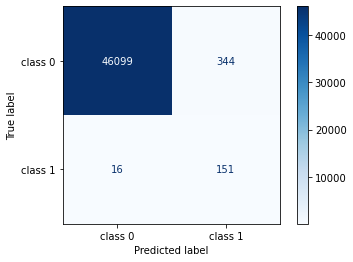

In [36]:
#performance results
print(classification_report(y_test, y_pred1, target_names=target_names))
plot_confusion_matrix(model1, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

  ## Over-sampling with SMOTE

In [38]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit on the trainning dataset
X_smote , y_smote = smote.fit_resample(df_X_train_stand, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0: 185731, 1: 705})
Resample dataset shape: Counter({0: 185731, 1: 185731})


 ### b) Logistic Regression with Synthetic minority over-sampling technique (LR+SMOTE)

In [39]:
#Run grid search only on training set using cross-validation
parameters={'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]}# l1 lasso l2 ridge
model2=GridSearchCV(LogisticRegression(solver='saga' ,max_iter=1000),parameters,cv=5, verbose=3)
model2.fit(X_smote,y_smote)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ...............C=0.001, penalty=l1;, score=0.990 total time= 1.5min
[CV 2/5] END ...............C=0.001, penalty=l1;, score=0.989 total time= 1.6min
[CV 3/5] END ...............C=0.001, penalty=l1;, score=0.989 total time= 1.6min
[CV 4/5] END ...............C=0.001, penalty=l1;, score=0.990 total time= 1.2min
[CV 5/5] END ...............C=0.001, penalty=l1;, score=0.990 total time= 1.6min
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.992 total time= 1.7min
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.992 total time= 1.7min
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.992 total time= 1.7min
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.992 total time= 1.3min
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.993 total time= 1.7min
[CV 1/5] END ................C=0.01, penalty=l1;, score=0.994 total time= 4.3min
[CV 2/5] END ................C=0.01, penalty=l1;

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, solver='saga'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [40]:
print("tuned hpyerparameters :(best parameters) ",model2.best_params_)
print("accuracy :",model2.best_score_)
print('Best Model:',model2.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9951246703314567
Best Model: LogisticRegression(max_iter=1000, solver='saga')


In [41]:
y_pred2=model2.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      0.99      1.00     46443
     class 1       0.35      0.92      0.50       167

    accuracy                           0.99     46610
   macro avg       0.67      0.95      0.75     46610
weighted avg       1.00      0.99      0.99     46610



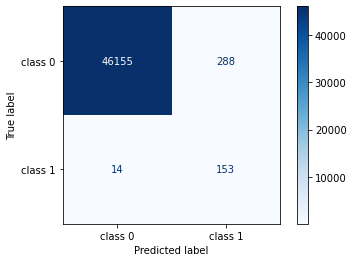

In [42]:
#performance results
print(classification_report(y_test, y_pred2, target_names=target_names))
plot_confusion_matrix(model2, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues); 

### c) Weighted Decision Tree (W-SVM)

In [43]:
#Run grid search only on training set using cross-validation
parameters = {'criterion':['gini','entropy'], 'max_depth' : [2,4,6,8,10,12]}
model3 = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), parameters, cv=5, verbose=3)
# fit on the trainning dataset
model3.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......criterion=gini, max_depth=2;, score=0.994 total time=   0.6s
[CV 2/5] END .......criterion=gini, max_depth=2;, score=0.994 total time=   0.6s
[CV 3/5] END .......criterion=gini, max_depth=2;, score=0.993 total time=   0.5s
[CV 4/5] END .......criterion=gini, max_depth=2;, score=0.993 total time=   0.6s
[CV 5/5] END .......criterion=gini, max_depth=2;, score=0.993 total time=   0.6s
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.997 total time=   0.8s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.997 total time=   0.8s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.999 total time=   1.1s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.997 total time=   0.9s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.997 total time=   0.9s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=1.000 total time=   0.8s
[CV 2/5] END .......criterion=gini, max_depth=6;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [44]:
print("tuned hpyerparameters :(best parameters) ",model3.best_params_)
print("accuracy :",model3.best_score_)
print('Best Model:',model3.best_estimator_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12}
accuracy : 0.9998498146148951
Best Model: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=12)


In [45]:
y_pred3 = model3.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     46443
     class 1       0.96      0.14      0.25       167

    accuracy                           1.00     46610
   macro avg       0.98      0.57      0.62     46610
weighted avg       1.00      1.00      1.00     46610



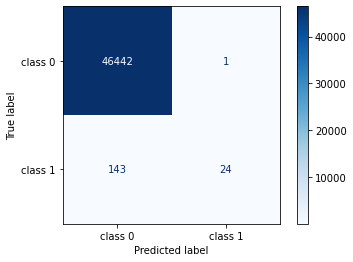

In [46]:
#performance results
print(classification_report(y_test, y_pred3, target_names=target_names))
plot_confusion_matrix(model3, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

## Undersampling using OSS
OneSidedSelection (OSS) is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. 

In [48]:
# Import library
from imblearn.under_sampling import OneSidedSelection

In [49]:
# define the undersampling method
oss = OneSidedSelection(random_state=0)
# fit on the trainning dataset
X_oss, y_oss = oss.fit_resample(df_X_train_stand, y_train)
# summarize the new class distribution
counter = Counter(y_oss)
print(counter)

Counter({0: 43466, 1: 705})


### d) Weighted Support Vector Machine with One Sided Selection (SVM+OSS)

In [50]:
#Run grid search only on training set using cross-validation
parameters = {'C':[1, 5, 10] }
model4 = GridSearchCV(SVC(class_weight='balanced', kernel='rbf'), parameters, cv=5, verbose=3)
model4.fit(X_oss, y_oss)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=1;, score=0.999 total time=   5.9s
[CV 2/5] END ...............................C=1;, score=0.998 total time=   6.6s
[CV 3/5] END ...............................C=1;, score=0.999 total time=   6.5s
[CV 4/5] END ...............................C=1;, score=0.999 total time=   6.1s
[CV 5/5] END ...............................C=1;, score=0.998 total time=   6.2s
[CV 1/5] END ...............................C=5;, score=0.999 total time=   4.1s
[CV 2/5] END ...............................C=5;, score=0.998 total time=   4.9s
[CV 3/5] END ...............................C=5;, score=0.999 total time=   4.2s
[CV 4/5] END ...............................C=5;, score=0.999 total time=   4.1s
[CV 5/5] END ...............................C=5;, score=0.999 total time=   3.0s
[CV 1/5] END ..............................C=10;, score=0.999 total time=   3.7s
[CV 2/5] END ..............................C=10;,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10]}, verbose=3)

In [51]:
print("tuned hpyerparameters :(best parameters) ",model4.best_params_)
print("accuracy :",model4.best_score_)
print('Best Model:',model4.best_estimator_)

tuned hpyerparameters :(best parameters)  {'C': 10}
accuracy : 0.998868030461615
Best Model: SVC(C=10, class_weight='balanced')


In [52]:
y_pred4 = model4.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     46443
     class 1       0.92      0.88      0.90       167

    accuracy                           1.00     46610
   macro avg       0.96      0.94      0.95     46610
weighted avg       1.00      1.00      1.00     46610



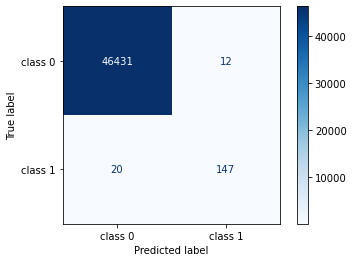

In [53]:
#performance results
print(classification_report(y_test, y_pred4, target_names=target_names))
plot_confusion_matrix(model4, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

### e)  XG Boost, Extreme Gradient Boosting (XGB)

In [55]:
#Run grid search only on training set using cross-validation
parameters = {'max_depth': [5, 10],'n_estimators': [100, 150], 'learning_rate': [0.1, 0.2]}
model5 = GridSearchCV(XGBClassifier(eval_metric='logloss',use_label_encoder =False), parameters, cv=5, verbose=3)
model5.fit(df_X_train_stand, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   2.8s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   2.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   2.6s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   2.6s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=100;, score=1.000 total time=   3.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   3.6s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   3.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   3.6s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total time=   3.5s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=150;, score=1.000 total tim

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=

In [56]:
print("tuned hpyerparameters :(best parameters) ",model5.best_params_)
print("accuracy :",model5.best_score_)
print('Best Model:',model5.best_estimator_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}
accuracy : 0.9999409986346708
Best Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=32,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)


In [57]:
y_pred5 = model5.predict(df_X_test_stand)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     46443
     class 1       1.00      0.22      0.35       167

    accuracy                           1.00     46610
   macro avg       1.00      0.61      0.68     46610
weighted avg       1.00      1.00      1.00     46610



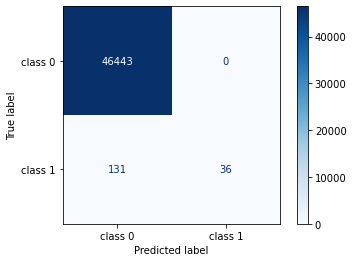

In [58]:
#performance results
print(classification_report(y_test, y_pred5, target_names=target_names))
plot_confusion_matrix(model5, df_X_test_stand, y_test, display_labels=target_names,cmap=plt.cm.Blues);

In [59]:
#save notebook session
import dill
dill.dump_session('session_esc-05.db')
#to restore a notebook session
#dill.load_session('session_esc-05.db')